# Entregável 1 - visão computacional

In [224]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [225]:
rintin = cv2.imread("RinTinTin.jpg")

In [226]:
rintin.shape

(240, 320, 3)

In [227]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [228]:
rintin_gray.shape

(240, 320)

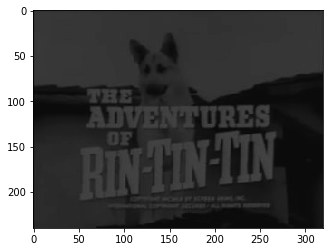

In [229]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

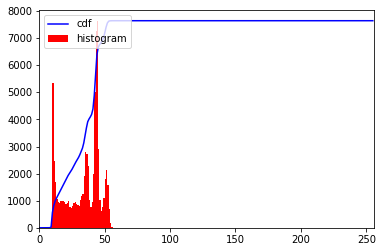

In [230]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

1. O histograma fornecido não aproveita bem as faixas de cores. Como pode ser observado nesse, as cores variam de poco mais de 0 até pouco mais de 50, sendo que o histograma compreeende do 0 até o 255

In [231]:
rintin_gray.shape

(240, 320)

In [232]:
maxv = rintin_gray.max()

In [233]:
minv = rintin_gray.min()

In [234]:
saida = np.zeros((240, 320), dtype=np.uint8)
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = (imagem_gray[i][j]*5.1) - 40.8

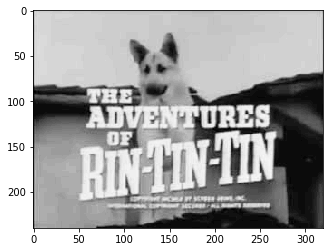

In [235]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [108]:
img = cv2.imread("cena_canto_sala.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(3024, 4032, 3)

In [109]:
img_r = img[:,:,0]
img_b = img[:,:,2]
img_r.shape

(3024, 4032)

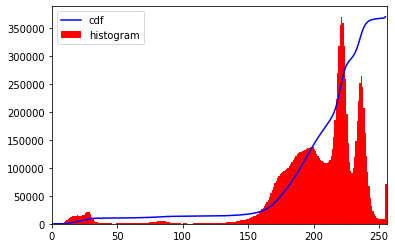

In [110]:
hist,bins = np.histogram(img_r,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

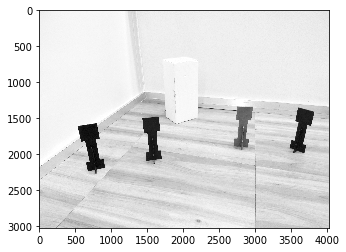

In [166]:
plt.imshow(img_r, cmap="Greys_r", vmin=0, vmax=255)

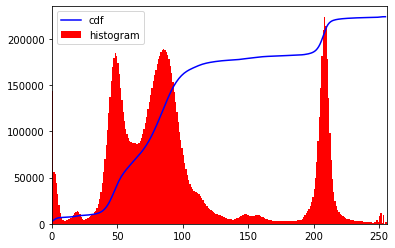

In [111]:
hist,bins = np.histogram(img_b,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_b.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

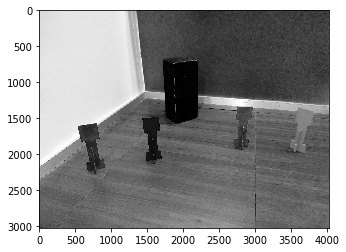

In [167]:
plt.imshow(img_b, cmap="Greys_r", vmin=0, vmax=255)

É possível identificar tanto a caixa vermelha quanto o creeper azul. Respectivamente, analisando os histogramas, o primeiro, baseado na cor vermelha, é possivel observar a caixa em seu extremo do eixo x, ja que esta apresenta alta homogeniedade em sua textura vermelha. O creeper, por sua vez, pode ser encontrado como o pico após a marca de 250 do histograma de coloração azul.

In [176]:
saidar = np.zeros((3024, 4032), dtype=np.uint8)
for i in range(img_r.shape[0]):
    for j in range(img_r.shape[1]):
        if img_r[i][j] > 215:
            saidar[i][j] = 255
        else:
            saidar[i][j] = 0

In [177]:
saidab = np.zeros((3024, 4032), dtype=np.uint8)
for i in range(img_b.shape[0]):
    for j in range(img_b.shape[1]):
        if img_b[i][j] < 30:
            saidab[i][j] = 255
        else:
            saidab[i][j] = 0

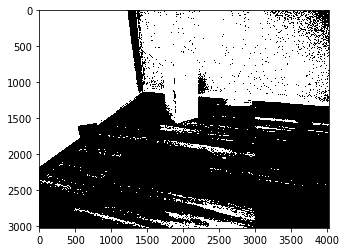

In [178]:
plt.imshow(saidar, cmap="Greys_r", vmin=0, vmax=255)

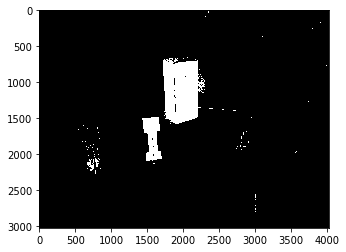

In [179]:
plt.imshow(saidab, cmap="Greys_r", vmin=0, vmax=255)

In [180]:
saidaf = np.zeros((3024, 4032), dtype=np.uint8)
for i in range(img_r.shape[0]):
    for j in range(img_r.shape[1]):
        if img_r[i][j] > 215 and img_b[i][j] < 30:
            saidaf[i][j] = 255
        else:
            saidaf[i][j] = 0

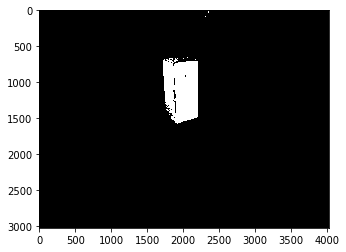

In [181]:
plt.imshow(saidaf, cmap="Greys_r", vmin=0, vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

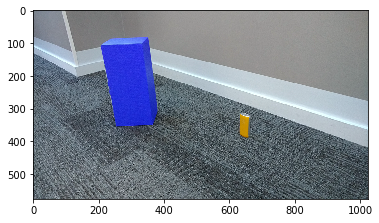

In [319]:
hall_box = cv2.imread("hall_box_battery_atividade3.png")
plt.imshow(hall_box, cmap="Greys_r", vmin=0, vmax=255)

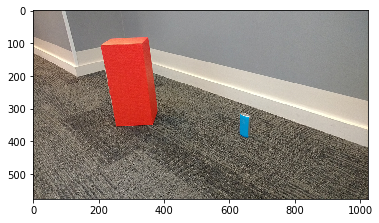

In [320]:
hall_boxf = cv2.cvtColor(hall_box, cv2.COLOR_BGR2RGB)
plt.imshow(hall_boxf, cmap="Greys_r", vmin=0, vmax=255)


In [321]:
print(hall_boxf.shape)

(576, 1024, 3)


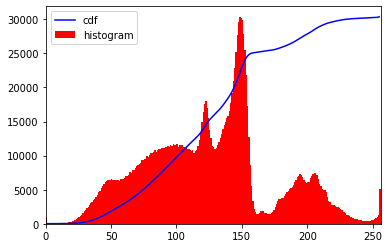

In [322]:
hist,bins = np.histogram(hall_boxf,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_boxf.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [393]:
hall_box_v = cv2.cvtColor(hall_boxf, cv2.COLOR_RGB2GRAY)
hall_boxfx = hall_box_v.copy()

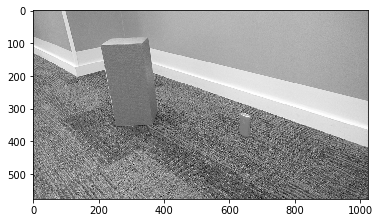

In [401]:
plt.imshow(hall_boxfx, cmap="Greys_r", vmin=0, vmax=255)

In [402]:
hall_boxfx.shape

(576, 1024)

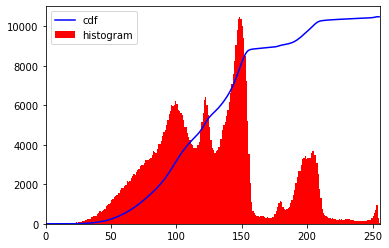

In [403]:
hist,bins = np.histogram(hall_boxfx,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_boxfx.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [420]:
saida = np.zeros((576,1024), dtype=np.uint8)
for i in range(hall_boxfx.shape[0]):
    for j in range(hall_boxfx.shape[1]):
        if j < 1023 and j != 0:
                saida[i][j] = abs(int(hall_boxfx[i][j+1]) - int(hall_boxfx[i][j-1]))
        else:
            saida[i][j] = hall_boxfx[i][j]

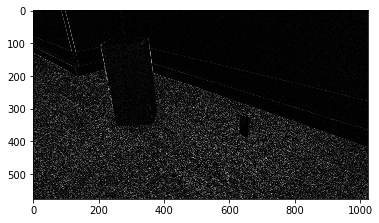

In [421]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

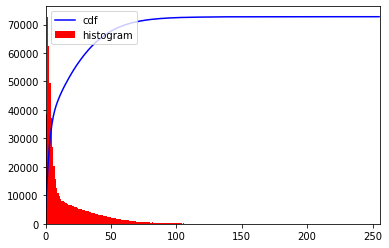

In [422]:
hist,bins = np.histogram(saida,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()